In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anthro.viz
colors = anthro.viz.plotting_style()
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [2]:
#%% Load the population data 
pop_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_rural_urban_population.csv')
pop_data['pop_bil'] = pop_data['population'] / 1E9
total_pop = pop_data.groupby(['year'])['pop_bil'].sum().reset_index()
min_pop, max_pop = total_pop['pop_bil'].min(), total_pop['pop_bil'].max()

In [2]:
# Load livestock data 
livestock = pd.read_csv('../../../data/agriculture/FAOSTAT_livestock_population/processed/FAOSTAT_livestock_population.csv')
livestock['category'] = 'other'
livestock.loc[livestock['animal']=='cattle', 'category'] = 'cattle'
livestock.loc[livestock['animal']=='chickens', 'category'] = 'chicken'
livestock.loc[livestock['animal']=='pigs', 'category'] = 'swine'

livestock = livestock.groupby(['year', 'category'])['population_Mhd'].sum().reset_index()

# Merge on population
merged = livestock.merge(total_pop, on='year')
merged.dropna(inplace=True)

NameError: name 'total_pop' is not defined

In [4]:
merged.head()

,year,category,population_Mhd,pop_bil
0,1961,cattle,942.175069,3.090305
1,1961,chicken,3906.690000,3.090305
2,1961,other,2175.390693,3.090305
3,1961,swine,406.180364,3.090305
4,1962,cattle,957.172513,3.149244


In [4]:
decades = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
cattle_decades = np.zeros(6)
chicken_decades = np.zeros(6)
swine_decades = np.zeros(6)
others_decades = np.zeros(6)

for i in range(len(decades)-1):
    
    decade = decades[i]
    
    df_decade = merged[merged['year']>= decade]
    df_decade = merged[merged['year']< decades[i+1]]
    
    pop_decade = df_decade['pop_bil'].mean()
    cattle_decade = df_decade[df_decade['category']=='cattle']['population_Mhd'].mean() / pop_decade
    chicken_decade = df_decade[df_decade['category']=='chicken']['population_Mhd'].mean() / pop_decade
    swine_decade = df_decade[df_decade['category']=='swine']['population_Mhd'].mean() / pop_decade
    other_decade = df_decade[df_decade['category']=='other']['population_Mhd'].mean() / pop_decade
    
    cattle_decades[i] = cattle_decade
    chicken_decades[i] = chicken_decade
    swine_decades[i] = swine_decade
    others_decades[i] = other_decade

findfont: Font family ['Lucida Sans Unicode'] not found. Falling back to DejaVu Sans.


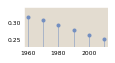

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(cattle_decades)*0.9/1e3, np.max(cattle_decades)*1.1/1e3))

ax.plot(decades[0:-1], cattle_decades/1e3, 'o', ms=3, color=colors['blue'])
ax.vlines(decades[0:-1], 0, cattle_decades/1e3, lw=0.5, color=colors['blue'])

plt.savefig('../../../figures/database_paper/cattle_decades.svg')

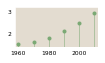

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(chicken_decades)*0.9/1e3, np.max(chicken_decades)*1.1/1e3))

ax.plot(decades[0:-1], chicken_decades/1e3, 'o',ms=3,  color=colors['green'])
ax.vlines(decades[0:-1], 0, chicken_decades/1e3, lw=0.5, color=colors['green'])

plt.savefig('../../../figures/database_paper/chicken_decades.svg')

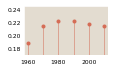

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.9))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(swine_decades)/1e3*0.9, np.max(swine_decades)/1e3*1.1))

ax.plot(decades[0:-1], swine_decades/1e3, 'o', ms=3, color=colors['red'])
ax.vlines(decades[0:-1], 0, swine_decades/1e3, lw=0.5, color=colors['red'])

plt.savefig('../../../figures/database_paper/swine_decades.svg')

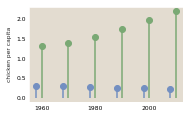

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(2.75,1.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_ylabel('chicken per capita', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))

ax.plot(decades[0:-1], chicken_decades/1e3, 'o', color=colors['green'])
ax.vlines(decades[0:-1], 0, chicken_decades/1e3, color=colors['green'])

ax.plot(np.asarray(decades[0:-1])-2, cattle_decades/1e3, 'o', color=colors['blue'])
ax.vlines(np.asarray(decades[0:-1])-2, 0, cattle_decades/1e3, color=colors['blue'])

#plt.savefig('../../../figures/database_paper/chicken_decades.svg')

In [7]:
plt.rcParams["font.family"] = "Lucida Sans Unicode"